In [29]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "..", ".."))
main_copy_dir = os.path.join(parent_dir, "main_copy")
octagon_analysis = os.path.join(parent_dir, "octagon_analysis")
# sys.path.append(main_copy_dir)
# sys.path.append(octagon_analysis)

print("Added paths to sys.path:", main_copy_dir, octagon_analysis)

Added paths to sys.path: d:\Tom\Documents\SWC\main_copy d:\Tom\Documents\SWC\octagon_analysis


In [30]:
%load_ext autoreload
%autoreload 2
import globals
import parse_data.prepare_data as prepare_data
import data_extraction.trial_list_filters as trial_list_filters
from matplotlib.patches import Wedge
from matplotlib import pyplot as plt
import data_extraction.get_indices as get_indices
import parse_data.identify_filepaths as identify_filepaths
import globals
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Polygon
from matplotlib import cm
import math
from parse_data import flip_rotate_trajectories
# import occupancy_and_strategy
from mpl_toolkits.axes_grid1 import make_axes_locatable
import data_strings
import data_extraction.data_saving as data_saving
import plotting.plot_octagon as plot_octagon

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
load_data = True
data_folder = data_strings.DATA_FOLDER


In [32]:
if load_data:
    # load previously prepared data
    trial_lists_solo = data_saving.load_data(r'trial_lists_solo_combined_standard_50')
    trial_lists_social = data_saving.load_data(r'trial_lists_social_standard_50')

else:

    data_folder = data_strings.DATA_FOLDER

    # combine consecutive solo sessions (pre- and post- for an individual player)
    json_filenames_social, json_filenames_solo = identify_filepaths.get_filenames()
    _, trial_lists = prepare_data.prepare_data(data_folder, json_filenames_solo, combine=False)
    print(len(trial_lists))
    trial_lists = [trial_lists[i] + trial_lists[i+1] for i in range(0, len(trial_lists), 2)]


### Social P(High) when Low first visible

In [33]:
# flip and rotate spatial positions (does not affect wall numbers or other information)

flip_rotated_socials_st = []

for trial_list_index in range(len(trial_lists_social)):
    trial_list = trial_lists_social[trial_list_index]
    flip_rotated_trials = []
    for trial_index in range(len(trial_list)):
        trial = trial_list[trial_index]
        trial = flip_rotate_trajectories.flip_rotate_trajectories(trial=trial)
        flip_rotated_trials.append(trial)

    flip_rotated_socials_st.append(flip_rotated_trials)

In [34]:
trial_lists_low_first_social = {}
trial_lists_indices_low_first_social = {}

# across both player IDs
for player_id in range(2):

    trial_lists_low_first_social[player_id] = []
    trial_lists_indices_low_first_social[player_id] = []

    # across trials
    for trial_list_index in range(len(flip_rotated_socials_st)):
        trial_list = flip_rotated_socials_st[trial_list_index]

        # filter for high/low trials
        trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type='HighLow')
        trial_list_filtered = [trial_list[i] for i in trial_indices]

        # and then trials with a retrievable choice
        (trial_list_filtered_player_choice_exists, player_choice_exists_indices) = trial_list_filters.filter_trials_retrievable_choice(trial_list_filtered, player_id=player_id, inferred_choice=True)
        
        # then, filter for trials where the wall [wall_first_vis_index] becomes visible first
        (trial_list_filtered_low_wall_initially_visible, low_wall_initially_visible_indices) = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_filtered_player_choice_exists,
                                                                                                                                                                player_id=player_id,
                                                                                                                                                                current_fov=110, wall_index=1,
                                                                                                                                                                  original_indices=player_choice_exists_indices)

        trial_lists_low_first_social[player_id].append(trial_list_filtered_low_wall_initially_visible)
        trial_lists_indices_low_first_social[player_id].append(low_wall_initially_visible_indices)

proportion loser's choice confident = 0.2549019607843137
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0.]
And the number of valid trials at this step is 19


d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:321: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:47: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:149: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


proportion loser's choice confident = 0.189873417721519
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
And the number of valid trials at this step is 14
proportion loser's choice confident = 0.20430107526881722
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
And the number of valid trials at this step is 14
proportion loser's choice confident = 0.18382352941176472
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0.]
And the number of valid tria

In [35]:

# binning params
n_rows, n_cols = 10, 10
x_min, x_max = -20, 20
y_min, y_max = -20, 20
grid_width = (x_max - x_min) / n_cols
grid_height = (y_max - y_min) / n_rows

# initialise bin counts grid, choice grid
bins_dict_social_low_first = np.zeros((n_rows, n_cols))
chose_high_dict_social_low_first = np.zeros((n_rows, n_cols))

# across player ID 1 or 2
for player_id in range(2):

    trial_lists = trial_lists_low_first_social[player_id]
    
    # across each trial list for this player ID
    for trial_list_index, trial_list in enumerate(trial_lists):

        # across each trial in the trial list
        for trial_index, trial in enumerate(trial_list):
            
            # get slice onset position (denominator)
            x_val, y_val = get_indices.get_player_slice_onset_loc(trial, player_id=player_id)

            # bin position
            x_bin = int((x_val - x_min) / grid_width)
            y_bin = int((y_val - y_min) / grid_height)

            # increment denominator bin count
            bins_dict_social_low_first[y_bin,x_bin] += 1

        # filter for trials where player chose high wall
        trial_list_filtered, original_indices = trial_list_filters.filter_trials_player_chose_given_wall(trial_list, player_id=player_id,
                                                                        inferred_choice=True,
                                                                        given_wall_index=0, # chose high
                                                                        original_indices=None,
                                                                        debug=False)

        # across each trial in the filtered list
        for trial_index, trial in enumerate(trial_list_filtered):
            # get slice onset position (numerator)
            x_val, y_val = get_indices.get_player_slice_onset_loc(trial, player_id=player_id)

            # bin position
            x_bin = int((x_val - x_min) / grid_width)
            y_bin = int((y_val - y_min) / grid_height)

            # increment numerator bin count
            chose_high_dict_social_low_first[y_bin,x_bin] += 1

proportion loser's choice confident = 0.5789473684210527
proportion loser's choice confident = 0.42857142857142855
proportion loser's choice confident = 0.5
proportion loser's choice confident = 0.42857142857142855
proportion loser's choice confident = 0.15384615384615385
proportion loser's choice confident = 0.3333333333333333
proportion loser's choice confident = 0.4482758620689655
proportion loser's choice confident = 0.375
proportion loser's choice confident = 0.07692307692307693
proportion loser's choice confident = 0.16666666666666666
proportion loser's choice confident = 0.43478260869565216
proportion loser's choice confident = 0.3333333333333333
proportion loser's choice confident = 0.25
proportion loser's choice confident = 0.375
proportion loser's choice confident = 0.4375
proportion loser's choice confident = 0.24
proportion loser's choice confident = 0.55
proportion loser's choice confident = 0.23333333333333334
proportion loser's choice confident = 0.5714285714285714
propo

In [36]:
# element-wise division of numerator and denominator arrays, with handling for division by zero
pH_by_bin_low_social = np.divide(
    chose_high_dict_social_low_first, bins_dict_social_low_first,
    out=np.zeros_like(chose_high_dict_social_low_first, dtype=float),
    # boolean array to mask division for only non-zero denominator entries
    where=bins_dict_social_low_first > 0
)

# filter out bins with fewer than 12 trials
pH_by_bin_low_social[bins_dict_social_low_first < 11] = np.nan

In [37]:
len(trial_lists_social)

50

In [41]:
chose_high_dict_social_low_first, bins_dict_social_low_first

(array([[  0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.],
        [  0.,   2.,   4.,   2.,   1.,   1.,   4.,   0.,   0.,   0.],
        [  0.,   2.,   3.,   2.,   4.,   3.,   3.,   0.,   0.,   0.],
        [  9.,   2.,   8.,  12.,  22.,   7.,   1.,   1.,   1.,   0.],
        [ 10.,   8.,   7.,  26.,  83.,  55.,  15.,   2.,   1.,   3.],
        [ 18.,  10.,  14.,  45., 108.,  80.,  15.,   1.,   4.,   2.],
        [ 31.,  19.,   9.,  30.,  41.,  25.,  11.,   6.,   1.,   2.],
        [  0.,  15.,  18.,  29.,  16.,  14.,   4.,   4.,   5.,   0.],
        [  0.,  49.,  16.,  18.,  12.,  17.,   5.,   7.,  10.,   0.],
        [  0.,   0.,   0.,  42.,  28.,  13.,  14.,   0.,   0.,   0.]]),
 array([[  0.,   0.,   0.,   2.,   2.,   3.,   0.,   0.,   0.,   0.],
        [  0.,   4.,   4.,   4.,   6.,   5.,   5.,   2.,   0.,   0.],
        [  0.,   5.,   4.,   7.,  13.,  17.,   8.,   2.,   4.,   0.],
        [ 11.,   4.,  11.,  27.,  53.,  47.,  19.,   7.,   5.,   1.],
        [ 13.,   9

In [39]:
pH_by_bin_low_social

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan, 0.30769231,
        0.17647059,        nan,        nan,        nan,        nan],
       [0.81818182,        nan, 0.72727273, 0.44444444, 0.41509434,
        0.14893617, 0.05263158,        nan,        nan,        nan],
       [0.76923077,        nan, 0.5       , 0.54166667, 0.47159091,
        0.33950617, 0.26315789, 0.15384615,        nan,        nan],
       [0.94736842, 0.76923077, 0.66666667, 0.63380282, 0.49315068,
        0.35714286, 0.26315789,        nan,        nan,        nan],
       [0.96875   , 0.95      , 0.75      , 0.66666667, 0.50617284,
        0.34722222, 0.2972973 , 0.4       ,        nan,        nan],
       [       nan, 0.9375    , 0.9473684

C:\Users\Tom\AppData\Local\Temp\ipykernel_19296\3873701531.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno').copy()


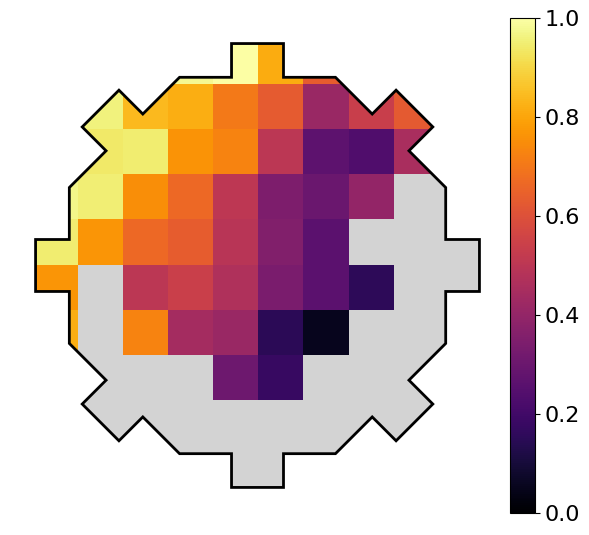

In [38]:

n_rows, n_cols = 10, 10
x_min, x_max = -20, 20
y_min, y_max = -20, 20
grid_width = (x_max - x_min) / n_cols
grid_height = (y_max - y_min) / n_rows

octagon_vertex_coordinates = plot_octagon.return_octagon_path_points()

fig, ax = plt.subplots(figsize=(6, 6))

cmap = cm.get_cmap('inferno').copy()
cmap.set_bad(color='lightgrey')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

im = ax.imshow(pH_by_bin_low_social, extent=[x_min, x_max, y_min, y_max],
               origin='lower', norm=norm, cmap=cmap)

patch = Polygon(octagon_vertex_coordinates, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(patch)
im.set_clip_path(patch)

ax.set_xlim([-22, 22])
ax.set_ylim([-22, 22])
ax.set_aspect(1.)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
#cbar.set_label("Average Occupancy", fontsize=16)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


### Heatmap P(high) when High first visible Social 

In [12]:
trial_lists_high_first_social = {}
trial_lists_indices_high_first_social = {}

for player_id in range(2):

    trial_lists_high_first_social[player_id] = []
    trial_lists_indices_high_first_social[player_id] = []

    for trial_list_index in range(len(flip_rotated_socials_st)):
        trial_list = flip_rotated_socials_st[trial_list_index]

        trial_indices = get_indices.get_trials_trialtype(trial_list, trial_type='HighLow')
        trial_list_filtered = [trial_list[i] for i in trial_indices]

        (trial_list_filtered_player_choice_exists, player_choice_exists_indices) = trial_list_filters.filter_trials_retrievable_choice(trial_list_filtered, player_id=player_id, inferred_choice=True)
        
        (trial_list_filtered_low_wall_initially_visible, low_wall_initially_visible_indices) = trial_list_filters.filter_trials_one_wall_becomes_visible_first(trial_list_filtered_player_choice_exists,
                                                                                                                                                                player_id=player_id, current_fov=110,
                                                                                                                                                                  wall_index=0, original_indices=player_choice_exists_indices)

        trial_lists_high_first_social[player_id].append(trial_list_filtered_low_wall_initially_visible)
        trial_lists_indices_high_first_social[player_id].append(low_wall_initially_visible_indices)

proportion loser's choice confident = 0.2549019607843137
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1.]
And the number of valid trials at this step is 25
proportion loser's choice confident = 0.189873417721519
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.]
And the number of valid trials at this step is 10
proportion loser's choice confident = 0.20430107526881722
filter_trials_one_wall_becomes_visible_first - given_wall_first_visible_session array:
[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
And the number of valid trials at this

In [13]:

# binning params
n_rows, n_cols = 10, 10
x_min, x_max = -20, 20
y_min, y_max = -20, 20
grid_width = (x_max - x_min) / n_cols
grid_height = (y_max - y_min) / n_rows

# bin counts grid
bins_dict_social_high_first = np.zeros((n_rows, n_cols))
# choice grid
chose_high_dict_social_high_first = np.zeros((n_rows, n_cols))

for player_id in range(2):

    trial_lists = trial_lists_high_first_social[player_id]
    
    for trial_list_index, trial_list in enumerate(trial_lists):

        for trial_index, trial in enumerate(trial_list):
            x_val, y_val = get_indices.get_player_slice_onset_loc(trial, player_id=player_id)

            x_bin = int((x_val - x_min) / grid_width)
            y_bin = int((y_val - y_min) / grid_height)

            bins_dict_social_high_first[y_bin,x_bin] += 1

        trial_list_filtered, original_indices = trial_list_filters.filter_trials_player_chose_given_wall(trial_list, player_id=player_id,
                                                                        inferred_choice=True,
                                                                        given_wall_index=0,
                                                                        original_indices=None,
                                                                        debug=False)

        for trial_index, trial in enumerate(trial_list_filtered):
            x_val, y_val = get_indices.get_player_slice_onset_loc(trial, player_id=player_id)

            x_bin = int((x_val - x_min) / grid_width)
            y_bin = int((y_val - y_min) / grid_height)

            chose_high_dict_social_high_first[y_bin,x_bin] += 1

proportion loser's choice confident = 0.48
proportion loser's choice confident = 0.3
proportion loser's choice confident = 0.3333333333333333
proportion loser's choice confident = 0.45161290322580644
proportion loser's choice confident = 0.2222222222222222
proportion loser's choice confident = 0.2903225806451613
proportion loser's choice confident = 0.2777777777777778
proportion loser's choice confident = 0.5454545454545454
proportion loser's choice confident = 0.3333333333333333
proportion loser's choice confident = 0.25806451612903225
proportion loser's choice confident = 0.5833333333333334
proportion loser's choice confident = 0.5
proportion loser's choice confident = 0.2777777777777778
proportion loser's choice confident = 0.1111111111111111
proportion loser's choice confident = 0.46153846153846156
proportion loser's choice confident = 0.4444444444444444
proportion loser's choice confident = 0.4
proportion loser's choice confident = 0.23076923076923078
proportion loser's choice con

In [17]:
pH_by_bin_high_social = np.divide(
    chose_high_dict_social_high_first, bins_dict_social_high_first,
    out=np.zeros_like(chose_high_dict_social_high_first, dtype=float),
    where=bins_dict_social_high_first > 0
)

pH_by_bin_high_social[bins_dict_social_high_first < 12] = np.nan

C:\Users\Tom\AppData\Local\Temp\ipykernel_19296\3474008519.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('inferno').copy()


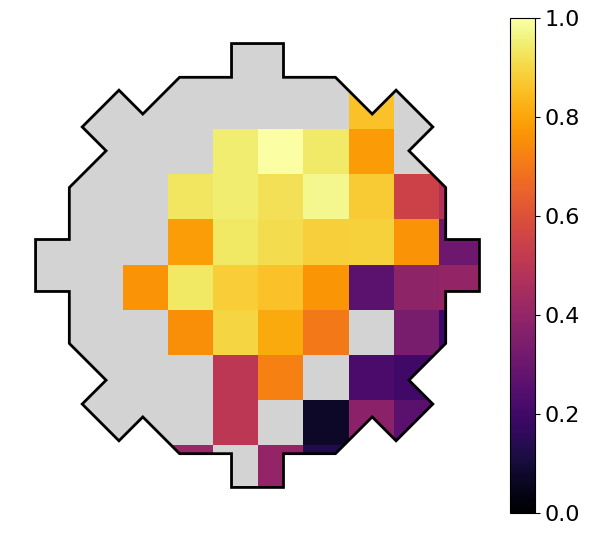

In [19]:

n_rows, n_cols = 10, 10
x_min, x_max = -20, 20
y_min, y_max = -20, 20
grid_width = (x_max - x_min) / n_cols
grid_height = (y_max - y_min) / n_rows

octagon_vertex_coordinates = plot_octagon.return_octagon_path_points()

fig, ax = plt.subplots(figsize=(6, 6))

cmap = cm.get_cmap('inferno').copy()
cmap.set_bad(color='lightgrey')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

im = ax.imshow(pH_by_bin_high_social, extent=[x_min, x_max, y_min, y_max],
               origin='lower', norm=norm, cmap=cmap)

patch = Polygon(octagon_vertex_coordinates, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(patch)
im.set_clip_path(patch)

ax.set_xlim([-22, 22])
ax.set_ylim([-22, 22])
ax.set_aspect(1.)
ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
#cbar.set_label("Average Occupancy", fontsize=16)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.show()


In [21]:
data_folder = data_strings.DATA_FOLDER
# social_files, ordered_solos = identify_filepaths.get_filenames(data_folder=data_folder)

In [56]:
# extract single trials
def split_session_by_trial(df):
    
    # groupby produces an interable of tuples with the group key and the dataframe 
    trials_list = [data for _, data in df.groupby('data.trialNum')]
    
    # exclude trial 0 (could also exclude trial 1)
    trials_list = trials_list[1:]

    # if final  trial does not contain a server selected trigger activation, discard it
    if not globals.SELECTED_TRIGGER_ACTIVATION in trials_list[-1]['eventDescription'].unique():
        trials_list = trials_list[:-1]

    return trials_list

In [22]:
for trial_list in trial_lists_social:
    score_changes = np.zeros((2,len(trial_list)))

    for trial_index in range(1,len(trial_list)):
        arr_1 = np.array(trial_list[trial_index]['data.playerScores.1'])
        prev_arr_1 = np.array(trial_list[trial_index-1]['data.playerScores.1'])
        print(trial_index-1)
        arr_0 = np.array(trial_list[trial_index]['data.playerScores.0'])
        prev_arr_0 = np.array(trial_list[trial_index-1]['data.playerScores.0'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
10

In [23]:
# computing score change per trial for all social lists

score_changes_socials = {}
# for file_index, json_filename in enumerate(social_files):
#     df = loading.loading_pipeline(data_folder, json_filename)
#     df = preprocess.standard_preprocessing(df)
#     trial_list = split_session_by_trial(df)

for trial_list_index, trial_list in enumerate(trial_lists_social):
    
    score_changes = np.zeros((2,len(trial_list)))

    for trial_index in range(len(trial_list)):
        arr_1 = np.array(trial_list[trial_index]['data.playerScores.1'])
        prev_arr_1 = np.array(trial_list[trial_index-1]['data.playerScores.1'])
        arr_0 = np.array(trial_list[trial_index]['data.playerScores.0'])
        prev_arr_0 = np.array(trial_list[trial_index-1]['data.playerScores.0'])

        prev_value_trial_1 = []
        prev_value_trial_0 = []
        value_trial_1 = []
        value_trial_0 = []

        if trial_index == 0:
            value_0 = (arr_0)[-1]

            print(value_0)

            for j in range(len(arr_1)):
                value_1 = (arr_1)[j]
                if not np.isnan(value_1):
                    #print(f"current value {value}")
                    value_trial_1.append(value_1)
            score_changes[1,trial_index] = (value_trial_1[0]-0)
            score_changes[0,trial_index] = (value_0-0)

        elif trial_index != 0:
            prev_value_0 = (prev_arr_0)[-1]
            value_0 = (arr_0)[-1]
            for k in range(len(prev_arr_1)):
                prev_value_1 = (prev_arr_1)[k]
                if not np.isnan(prev_value_1):
                    #print(f"previous value {prev_value}")
                    prev_value_trial_1.append(prev_value_1)
            for j in range(len(arr_1)):
                value_1 = (arr_1)[j]
                if not np.isnan(value_1):
                    #print(f"current value {value}")
                    value_trial_1.append(value_1)
            score_changes[1,trial_index] = (value_trial_1[0]-prev_value_trial_1[0])
            score_changes[0,trial_index] = (value_0-prev_value_0)
    
    score_changes_socials[trial_list_index] = score_changes
    

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [24]:
score_changes_socials

{0: array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [50.,  0.,  0.,  0., 50., 50.,  0., 20.,  0., 20., 20.,  0., 50.,
         50., 50., 20.,  0., 50., 50.,  0., 50., 20., 20.,  0., 50.,  0.,
          0., 50.,  0.,  0., 20.,  0., 50., 20.,  0., 50., 50., 20., 50.,
         50., 50.,  0.,  0., 50., 50., 

In [25]:
n_rings = 5

# max_dist = occupancy_and_strategy.return_maximum_distance()
max_dist = plot_octagon.return_maximum_distance()
max_dist = 39.45367787223368
max_radius = max_dist/2

sum_performance_polar = np.zeros((n_rings))
count_polar = np.zeros((n_rings))
xy_values = {}

# for file_index, json_filename in enumerate(social_files):
#     df = loading.loading_pipeline(data_folder, json_filename)
#     df = preprocess.standard_preprocessing(df)
#     trial_list = split_session_by_trial(df)
for trial_list_index, trial_list in enumerate(trial_lists_social):
    for player_id in(range(0,2)):
        score_arr = score_changes_socials[trial_list_index][player_id]
        for trial_index in range(len(trial_list)):
            trial = trial_list[trial_index]
            score = score_arr[trial_index]
            x_val, y_val = get_indices.get_player_slice_onset_loc(trial, player_id)
            print(f"position x and y: {x_val}, {y_val}")

            r = np.sqrt(x_val**2 + y_val**2)
            print(f"polar position: {r}")

            r_bin = int(r / (max_radius / n_rings))
            print(f"bin assignment {r_bin}")

            if r_bin not in xy_values:
                xy_values[r_bin] = []
            if 0 <= r_bin < n_rings:
                sum_performance_polar[r_bin] += score
                count_polar[r_bin] += 1
                xy_values[r_bin].append((x_val, y_val))


position x and y: -1.6792796850204468, 3.300809621810913
polar position: 3.703420637729648
bin assignment 0
position x and y: 5.654138088226318, 15.102668762207031
polar position: 16.126372228795777
bin assignment 4
position x and y: 13.669239044189453, 4.289867877960205
polar position: 14.326585861870518
bin assignment 3
position x and y: -5.356249809265137, -16.14360809326172
polar position: 17.008982752889075
bin assignment 4
position x and y: -14.024356842041016, -5.953135013580322
polar position: 15.235563702167985
bin assignment 3
position x and y: -7.804548263549805, 14.193727493286133
polar position: 16.197928069717587
bin assignment 4
position x and y: 2.534977436065674, 7.979119777679443
polar position: 8.372124164626165
bin assignment 2
position x and y: -7.952569007873535, -11.836822509765625
polar position: 14.260214618044317
bin assignment 3
position x and y: -3.588996171951294, 6.644378185272217
polar position: 7.551731919977189
bin assignment 1
position x and y: -0.9959

In [26]:
mean_score_polar = np.divide(sum_performance_polar, count_polar, out=np.zeros_like(sum_performance_polar), where=(count_polar != 0))

In [27]:
mean_score_polar

array([nan, nan, nan, nan, nan])

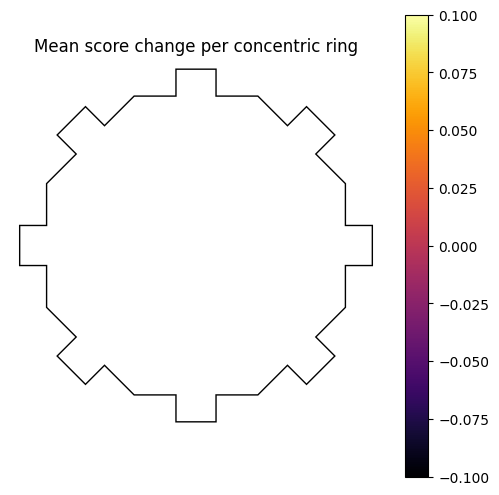

In [28]:
fig, ax = plt.subplots(figsize=(6,6))

octagon_vertex_coordinates = plot_octagon.return_octagon_path_points()


center = (0, 0)
r1 = max_radius / n_rings 
r2 = (max_radius / n_rings)*2
r3 = (max_radius / n_rings)*3
r4 = (max_radius / n_rings)*4
r5 = (max_radius / n_rings)*5

radii = [r1, r2, r3, r4, r5]

import matplotlib as mp

c1 = mean_score_polar[0]
c2 = mean_score_polar[1]
c3 = mean_score_polar[2]
c4 = mean_score_polar[3]
c5 = mean_score_polar[4]

color_values = [c1, c2, c3, c4, c5]

minima = min(color_values)
maxima = max(color_values)

norm = mp.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

colors = []

for c in color_values:
    color = mapper.to_rgba(c)
    colors.append(color)


center_circle = Wedge(center, r=radii[0], theta1=0, theta2=360, width=None, facecolor=colors[0])
ax.add_patch(center_circle)

for i in range(len(radii)-1):
    annulus = Wedge(center, r=radii[i+1], theta1=0, theta2=360, width=radii[i+1]-radii[i], facecolor=colors[i+1])
    ax.add_patch(annulus)

oct_patch = Polygon(octagon_vertex_coordinates, edgecolor='black', facecolor='none', lw=2)
ax.add_patch(oct_patch)

ax.axis('off')
ax.set_aspect('equal')
ax.set_xlim(-radii[-1]-1, radii[-1]+1)
ax.set_ylim(-radii[-1]-1, radii[-1]+1)

# limits
limit = radii[-1] + 1

# outer rectangle
outer_rect = [
    [-limit, -limit],
    [-limit,  limit],
    [ limit,  limit],
    [ limit, -limit],
    [-limit, -limit]
]

octagon = np.array(octagon_vertex_coordinates)
if not np.allclose(octagon[0], octagon[-1]):
    octagon = np.vstack([octagon, octagon[0]]) 

outer_path = Path(outer_rect)
hole_path = Path(octagon[::-1])

compound_path = Path.make_compound_path(outer_path, hole_path)

white_patch = PathPatch(compound_path, facecolor='white', edgecolor='none', zorder=10)
ax.add_patch(white_patch)

cbar = plt.colorbar(mapper, ax=ax, pad=0.05)

plt.title("Mean score change per concentric ring")
plt.show()